In [40]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import re


In [41]:
# import the data
path = 'C:/Users/20202201/Documents/Uni/Master/Year2/Semester 1/Natural Language Processing/NLP/Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id,Date,Open,Close,clean_content,label,tokenized_content,new_tokenized
0,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ECB Effects\nThe move in the euro was huge fa...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,2019-03-07,3.77750,3.73150,ecb effect move euro huge falling pip huge imp...,0,"['ecb', 'effect', 'move', 'euro', 'huge', 'fal...","[ecb, effect, move, euro, huge, falling, pip, ..."
1,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,2019-03-06,3.90400,3.80125,stock watch march trading session stock stock ...,0,"['stock', 'watch', 'march', 'trading', 'sessio...","[stock, watch, march, trading, session, stock,..."
2,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,Investing com A rout in Apple and Facebook ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,2018-11-19,4.04475,3.61750,investing com rout apple facebook nasdaq fb mo...,0,"['investing', 'com', 'rout', 'apple', 'faceboo...","[investing, com, rout, apple, facebook, nasdaq..."
3,221597,UBER,The Best Of CES 2020 Revised,opinion,With 4 500 companies bringing their innovation...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,2020-01-16,6.19300,6.22325,company bringing innovation ce jan get really ...,1,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."
4,221614,UBER,The Best Of CES 2020,opinion,With 4 500 companies bringing their innovation...,2020-01-10,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200498063,2020-01-10,6.18325,6.10800,company bringing innovation ce jan get really ...,0,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."


## Iteration 1

In [42]:
#data
processed_texts = df_cleaned['new_tokenized'].head(5)

# create dictionary
id2word = corpora.Dictionary(df_cleaned['new_tokenized'])

# create corpus
text = df_cleaned['new_tokenized']

# Term Document Frequency
corpus = [id2word.doc2bow(text1) for text1 in text]

##### Now I used the original code from the lecture with 3 topics

In [43]:
# Build LDA model
lda_model1 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=3, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)

In [47]:
#get the diversity score
topics = lda_model1.print_topics()
# Print the topics
for topic in lda_model1.print_topics():
    print(topic)
#Get coherence score
print(CoherenceModel(model=lda_model1, texts=text, dictionary=id2word, coherence='c_v').get_coherence())


(0, '0.020*"year" + 0.018*"zacks" + 0.016*"company" + 0.015*"quarter" + 0.014*"earnings" + 0.014*"stock" + 0.012*"revenue" + 0.010*"growth" + 0.009*"estimate" + 0.008*"share"')
(1, '0.012*"company" + 0.010*"nasdaq" + 0.009*"nvidia" + 0.008*"technology" + 0.006*"intel" + 0.006*"market" + 0.006*"chip" + 0.006*"new" + 0.005*"year" + 0.005*"said"')
(2, '0.013*"nasdaq" + 0.012*"stock" + 0.009*"market" + 0.007*"nyse" + 0.006*"week" + 0.006*"day" + 0.006*"trade" + 0.006*"year" + 0.006*"nvidia" + 0.006*"index"')
0.4361960573171025


In [ ]:
# get the interpretability score



# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Perplexity:  -7.691075675040715

Coherence Score:  0.4361960573171025


## Iteration 2
#### Brams Iteration 1

In [49]:
# Build LDA model
lda_model2 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=100, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)




In [50]:
# get the perplexity score
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())




Perplexity:  -9.537245066827204

Coherence Score:  0.43831621580680696


In [51]:
for topic in lda_model2.print_topics():
    print(topic)

(43, '0.000*"company" + 0.000*"year" + 0.000*"stock" + 0.000*"market" + 0.000*"growth" + 0.000*"earnings" + 0.000*"nasdaq" + 0.000*"last" + 0.000*"day" + 0.000*"zacks"')
(95, '0.014*"smh" + 0.009*"retrace" + 0.004*"calculated" + 0.003*"max" + 0.003*"merge" + 0.002*"stall" + 0.002*"noticed" + 0.002*"retraced" + 0.002*"excitedly" + 0.002*"dramatically"')
(80, '0.014*"ktos" + 0.012*"pega" + 0.011*"immr" + 0.007*"ttd" + 0.003*"halo" + 0.003*"dox" + 0.003*"arcb" + 0.003*"nktr" + 0.002*"symc" + 0.002*"glob"')
(69, '0.030*"duty" + 0.027*"destiny" + 0.025*"wwii" + 0.011*"exascale" + 0.010*"activision" + 0.005*"deferral" + 0.002*"pathfoward" + 0.002*"258m" + 0.002*"430m" + 0.002*"quintillion"')
(77, '0.022*"ssg" + 0.013*"soxs" + 0.012*"soxl" + 0.004*"xthpreviously" + 0.002*"mover" + 0.001*"samsung" + 0.001*"jan" + 0.001*"xsd" + 0.000*"split" + 0.000*"market"')
(55, '0.027*"inject" + 0.014*"hialgo" + 0.009*"treated" + 0.007*"nvdia" + 0.003*"axti" + 0.002*"aosl" + 0.002*"wework" + 0.002*"furtheri

In [15]:
topics = lda_model2.show_topics(formatted=False)
# topic_words = {i: [word for word, _ in words] for i, words in topics}
# topic_words

#give me all the 100 topics instead of only a few
for i in range(100):
    print(f"Topic {i}: {lda_model2.print_topic(i)}")
    

Topic 0: 0.035*"year" + 0.023*"revenue" + 0.023*"quarter" + 0.017*"company" + 0.013*"growth" + 0.012*"billion" + 0.012*"million" + 0.011*"zacks" + 0.009*"margin" + 0.009*"product"
Topic 1: 0.072*"mellanox" + 0.048*"ethernet" + 0.045*"data" + 0.045*"storage" + 0.032*"switch" + 0.026*"marvell" + 0.022*"demand" + 0.021*"network" + 0.021*"solution" + 0.018*"networking"
Topic 2: 0.022*"thomas" + 0.019*"barkin" + 0.014*"richmond" + 0.010*"listens" + 0.009*"zurich" + 0.008*"vodafone" + 0.008*"vod" + 0.008*"clarida" + 0.000*"stock" + 0.000*"market"
Topic 3: 0.039*"zacks" + 0.034*"earnings" + 0.031*"quarter" + 0.026*"company" + 0.023*"rank" + 0.020*"stock" + 0.019*"estimate" + 0.016*"surprise" + 0.015*"esp" + 0.014*"positive"
Topic 4: 0.015*"company" + 0.014*"game" + 0.013*"gaming" + 0.013*"nasdaq" + 0.011*"nvidia" + 0.011*"year" + 0.010*"platform" + 0.009*"service" + 0.009*"growth" + 0.008*"billion"
Topic 5: 0.007*"isight" + 0.003*"cttay" + 0.003*"cttaf" + 0.003*"v100s" + 0.002*"citron" + 0.00

## Iteration 3

In [26]:
# given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100, 200, 300, 400, 500]


# now run the model for all combinations
results = []

for i in tqdm(range(len(numb_topics))):
    lda_model3 = LdaModel(corpus=corpus, 
                            id2word=id2word, 
                            num_topics=numb_topics[i], 
                            random_state=2065721, 
                            passes=1, 
                            alpha='auto', 
                            per_word_topics=True,
                            update_every=1)
    
    # Track coherence
    coherence_model_lda = CoherenceModel(model=lda_model3, texts=text, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Track perplexity
    perplexity = lda_model3.log_perplexity(corpus)
    
    results.append([numb_topics[i], coherence_lda, perplexity])


 43%|████▎     | 6/14 [03:14<04:38, 34.77s/it]c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
100%|██████████| 14/14 [24:59<00:00, 107.08s/it]


In [36]:
results
#change num_tpics to index
results_df = results[['num_topics', 'coherence']]
results_df

,num_topics,coherence
0,2,0.392664
1,3,0.392693
2,5,0.386169
3,10,0.373877
4,15,0.359625
5,20,0.362244
6,40,NaN
7,60,NaN
8,80,NaN
9,100,NaN


In [38]:
from tqdm import tqdm
from gensim.models import LdaModel, CoherenceModel
import pandas as pd

# Given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100]

# List to store results
results = []

# Run the model for all combinations
for num in tqdm(numb_topics):
    # Build LDA model
    lda_model3 = LdaModel(corpus=corpus, 
                          id2word=id2word, 
                          num_topics=num, 
                          random_state=2065721, 
                          passes=5,    # Use more passes for better topic quality
                          alpha='auto', 
                          per_word_topics=True,
                          update_every=1)
    
    # Track coherence
    coherence_model_lda = CoherenceModel(model=lda_model3, texts=text, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Track perplexity
    perplexity = lda_model3.log_perplexity(corpus)
    
    # Append results
    results.append([num, coherence_lda, perplexity])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['num_topics', 'coherence', 'perplexity'])
print(results_df)


100%|██████████| 10/10 [26:22<00:00, 158.23s/it]

   num_topics  coherence  perplexity
0           2   0.400678   -7.754523
1           3   0.436449   -7.691079
2           5   0.446688   -7.660573
3          10   0.441774   -7.678273
4          15        NaN   -7.776048
5          20        NaN   -7.862107
6          40        NaN   -8.291536
7          60        NaN   -8.706753
8          80        NaN   -9.141206
9         100        NaN   -9.537245


In [ ]:
from tqdm import tqdm
from gensim.models import LdaModel, CoherenceModel
import pandas as pd

# Given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100]

# List to store results
results = []

# Run the model for all combinations
for num in tqdm(numb_topics):
    # Build LDA model
    lda_model3 = LdaModel(corpus=corpus, 
                          id2word=id2word, 
                          num_topics=num, 
                          random_state=2065721, 
                          passes=2,            # Increased passes for better topic convergence
                          #iterations=100,       # More iterations for better quality topics
                          alpha='auto', 
                          per_word_topics=True,
                          update_every=1)
    
    # Check if topics are empty or too sparse
    topics = lda_model3.show_topics(num_topics=num, formatted=False)
    non_empty_topics = [t for t in topics if len(t[1]) > 0]
    
    if len(non_empty_topics) < num:
        print(f"Warning: Only {len(non_empty_topics)} out of {num} topics are non-empty for num_topics={num}")
    
    # Track coherence
    try:
        coherence_model_lda = CoherenceModel(model=lda_model3, texts=text, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
    except ValueError as e:
        coherence_lda = None  # Set to None if coherence cannot be calculated
        print(f"Error calculating coherence for num_topics={num}: {e}")
    
    # Track perplexity
    perplexity = lda_model3.log_perplexity(corpus)
    
    # Append results
    results.append([num, coherence_lda, perplexity])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['num_topics', 'coherence', 'perplexity'])
print(results_df)


 40%|████      | 4/10 [04:42<07:28, 74.68s/it]c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
 60%|██████    | 6/10 [5:37:25<3:44:57, 3374.27s/it]


KeyboardInterrupt: 

([<matplotlib.axis.XTick at 0x20a39481280>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '5'),
  Text(3, 0, '10'),
  Text(4, 0, '15'),
  Text(5, 0, '20'),
  Text(6, 0, '40'),
  Text(7, 0, '60'),
  Text(8, 0, '80'),
  Text(9, 0, '100'),
  Text(10, 0, '200'),
  Text(11, 0, '300'),
  Text(12, 0, '400'),
  Text(13, 0, '500')])

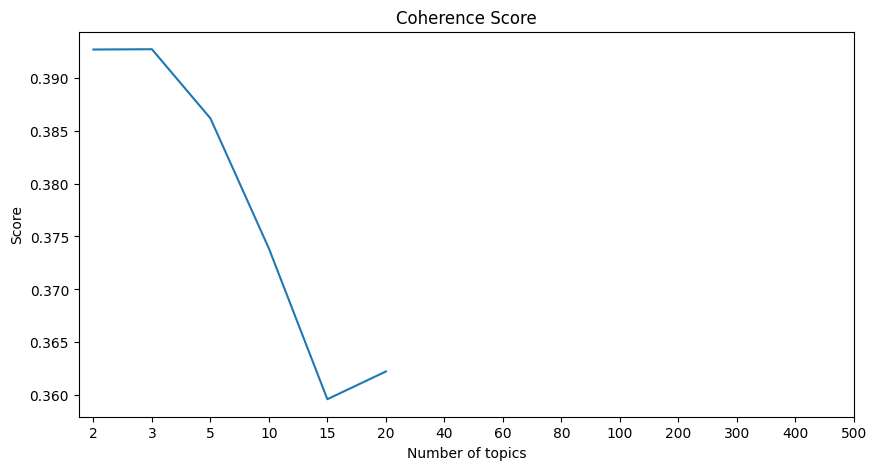

In [ ]:
results = pd.DataFrame(results, columns=['num_topics', 'coherence', 'perplexity'])
# create a lineplot from results['coherence'] and results['perplexity']
plt.figure(figsize=(10, 5))
plt.plot(results['coherence'], label='Coherence')
plt.xlabel('Number of topics')
plt.ylabel('Score')
plt.title('Coherence Score')

#change the  x axis to the number of topics
plt.xticks(range(len(numb_topics)), numb_topics)




In [ ]:
# get the coherence score of the best model
best_model = results[results['coherence'].idxmax()]
print(f"Best model has {best_model[0]} topics with a coherence score of {best_model[1]} and a perplexity of {best_model[2]}")

KeyError: 1

In [30]:
# get the topics of the best model
topics = lda_model3.show_topics(formatted=False)


#give me all the 100 topics instead of only a few
for i in range(1000):
    print(f"Topic {i}: {lda_model3.print_topic(i)}")

Topic 0: 0.025*"year" + 0.013*"nvidia" + 0.013*"company" + 0.012*"stock" + 0.010*"nasdaq" + 0.010*"zacks" + 0.010*"growth" + 0.010*"estimate" + 0.008*"quarter" + 0.008*"revenue"
Topic 1: 0.009*"apple" + 0.008*"year" + 0.007*"nasdaq" + 0.006*"company" + 0.005*"service" + 0.005*"new" + 0.005*"quarter" + 0.004*"also" + 0.004*"vehicle" + 0.004*"share"
Topic 2: 0.010*"nvidia" + 0.007*"market" + 0.007*"forthcoming" + 0.007*"nvda" + 0.006*"nasdaq" + 0.006*"china" + 0.006*"guideline" + 0.006*"trade" + 0.006*"week" + 0.006*"year"
Topic 3: 0.046*"earnings" + 0.020*"zacks" + 0.017*"quarter" + 0.017*"estimate" + 0.016*"stock" + 0.016*"company" + 0.015*"esp" + 0.013*"rank" + 0.012*"year" + 0.011*"nasdaq"
Topic 4: 0.020*"year" + 0.017*"nasdaq" + 0.012*"company" + 0.011*"nyse" + 0.011*"stock" + 0.010*"fmc" + 0.009*"earnings" + 0.007*"zacks" + 0.006*"quarter" + 0.006*"market"
Topic 5: 0.012*"year" + 0.011*"nasdaq" + 0.010*"stock" + 0.008*"growth" + 0.008*"also" + 0.007*"company" + 0.007*"billion" + 0.

IndexError: index 500 is out of bounds for axis 0 with size 500

## Iteration 4
#### Brams iteration 2

In [52]:
type(text)

pandas.core.series.Series

In [23]:
import re
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel

# Clean data again: remove words with numbers
number_pattern = re.compile(r'.*\d')
text2 = text.apply(lambda x: [word for word in x if not number_pattern.match(word)])

# Create dictionary
id2word2 = corpora.Dictionary(text2)

# Create corpus using the updated dictionary
corpus2 = [id2word2.doc2bow(doc) for doc in text2]

# Check that text2 is a list of lists
if not all(isinstance(doc, list) for doc in text2):
    raise ValueError("The 'text2' variable should be a list of tokenized texts, with each text as a list of words.")

# Build LDA model
lda_model4 = LdaModel(corpus=corpus2, 
                     id2word=id2word2, 
                     num_topics=100, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)

# Get the perplexity score
print('\nPerplexity: ', lda_model4.log_perplexity(corpus2))

# Get the coherence score with error handling
try:
    coherence_model_lda = CoherenceModel(model=lda_model4, texts=text2, dictionary=id2word2, coherence='c_v')
    print('\nCoherence Score: ', coherence_model_lda.get_coherence())
except Exception as e:
    print("Error calculating coherence score:", e)




Perplexity:  -9.213774759662913

Coherence Score:  0.4313369976157901


In [6]:
# get the perplexity score
print('\nPerplexity: ', lda_model4.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model4, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Perplexity:  -9.537245066827204


c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


In [ ]:
topics = lda_model4.show_topics(formatted=False)
# topic_words = {i: [word for word, _ in words] for i, words in topics}
# topic_words

#give me all the 100 topics instead of only a few
for i in range(100):
    print(f"Topic {i}: {lda_model2.print_topic(i)}")

## Iteration 5
#### Brams iteration 3

In [53]:
# from text, drop words that occur less than 5 times and more than 2000 times

#count how many times each word occurs
word_freq = {id2word[word_id]: freq for word_id, freq in id2word.cfs.items()}
word_freq = pd.Series(word_freq)

#drop words that occur less than 5 times and more than 2000 times
id2word.filter_extremes(no_below=5, no_above=2000)

# Term Document Frequency
corpus = [id2word.doc2bow(text1) for text1 in text]



In [54]:
# given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# now run the model for all combinations
results = []

for i in tqdm(range(len(numb_topics))):
    lda_model5 = LdaModel(corpus=corpus, 
                            id2word=id2word, 
                            num_topics=numb_topics[i], 
                            random_state=2065721, 
                            passes=1, 
                            alpha='auto', 
                            per_word_topics=True,
                            update_every=1)
    
    # Track coherence
    coherence_model_lda = CoherenceModel(model=lda_model5, texts=text, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Track perplexity
    perplexity = lda_model5.log_perplexity(corpus)
    
    results.append([numb_topics[i], coherence_lda, perplexity])

100%|██████████| 14/14 [21:41<00:00, 92.94s/it] 


In [56]:
# results to dataframe
results = pd.DataFrame(results, columns=['num_topics', 'coherence', 'perplexity'])
results

,num_topics,coherence,perplexity
0,2,0.371404,-7.551470
1,3,0.409103,-7.533406
2,5,0.387501,-7.534215
3,10,0.398517,-7.556249
4,15,0.383552,-7.595877
5,20,0.388570,-7.654990
6,30,0.378341,-7.740524
7,40,0.379900,-7.852799
8,50,0.377231,-7.956448
9,60,0.375059,-8.065477


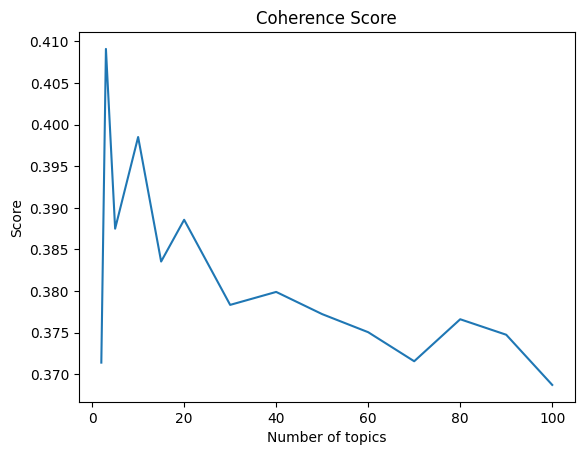

In [58]:
plt.plot(results['num_topics'], results['coherence'])
plt.title('Coherence Score')
plt.xlabel('Number of topics')
plt.ylabel('Score')
plt.show();

In [ ]:
# give the topics of the best model
best_model = results.loc[results['coherence'].idxmax()]

topics = best_model.show_topics(formatted=False)
# topic_words = {i: [word for word, _ in words] for i, words in topics}
# topic_words

#give me all the 100 topics instead of only a few
for i in range(100):
    print(f"Topic {i}: {lda_model2.print_topic(i)}")


## Iteration 6
#### Brams iteration 4

In [61]:
# drop the following 
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

# drop the words from the corpus
text = text.apply(lambda x: [word for word in x if word not in words_to_filter])

# create dictionary
id2word = corpora.Dictionary(text)

In [62]:
# Build LDA model
lda_model4 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=40, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)


# get the perplexity score
print('\nPerplexity: ', lda_model4.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model4, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Perplexity:  -7.394605158419564

Coherence Score:  0.4849078912921282


In [67]:
topics = lda_model4.show_topics(formatted=False)
# topic_words = {i: [word for word, _ in words] for i, words in topics}
# topic_words

#give me all the 100 topics instead of only a few
for i in range(40):
    print(f"Topic {i}: {lda_model4.print_topic(i)}")

Topic 0: 0.031*"avgo" + 0.016*"owns" + 0.016*"agreed" + 0.014*"sank" + 0.013*"grand" + 0.006*"anymore" + 0.006*"registered" + 0.005*"respective" + 0.004*"dented" + 0.004*"defensive"
Topic 1: 0.080*"lq" + 0.077*"apple" + 0.033*"fusion" + 0.012*"lot" + 0.011*"downhill" + 0.010*"compete" + 0.010*"supplying" + 0.008*"aapl" + 0.008*"keynvidia" + 0.008*"demand"
Topic 2: 0.033*"strengthen" + 0.022*"one" + 0.014*"pullback" + 0.013*"iwm" + 0.012*"mind" + 0.011*"smartwatches" + 0.010*"impeachment" + 0.010*"zone" + 0.010*"goal" + 0.010*"shoulder"
Topic 3: 0.001*"5yr" + 0.001*"vdsi" + 0.001*"takegiven" + 0.001*"teraflop" + 0.001*"zone" + 0.001*"coming" + 0.001*"nearly" + 0.000*"proven" + 0.000*"strengthen" + 0.000*"mind"
Topic 4: 0.004*"growththe" + 0.000*"zone" + 0.000*"nearly" + 0.000*"coming" + 0.000*"trial" + 0.000*"strengthen" + 0.000*"5g" + 0.000*"biotech" + 0.000*"goal" + 0.000*"mind"
Topic 5: 0.047*"upward" + 0.031*"truth" + 0.012*"fretting" + 0.011*"weaponize" + 0.010*"hollyfrontier" + 0.

In [68]:
   
# get the interpretability score


# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model4, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Coherence Score:  0.4849078912921282


In [63]:
for topic in lda_model4.print_topics():
    print(topic)

(23, '0.002*"ancestor" + 0.001*"unmanaged" + 0.001*"mayhem" + 0.001*"thrown" + 0.001*"x86" + 0.001*"walmart" + 0.001*"nearly" + 0.001*"original" + 0.000*"yes" + 0.000*"supplement"')
(19, '0.000*"coming" + 0.000*"zone" + 0.000*"strengthen" + 0.000*"nearly" + 0.000*"trial" + 0.000*"equity" + 0.000*"mind" + 0.000*"smartwatches" + 0.000*"shoulder" + 0.000*"realize"')
(5, '0.047*"upward" + 0.031*"truth" + 0.012*"fretting" + 0.011*"weaponize" + 0.010*"hollyfrontier" + 0.007*"kim" + 0.007*"hfc" + 0.007*"moody" + 0.007*"specialist" + 0.007*"pennant"')
(4, '0.004*"growththe" + 0.000*"zone" + 0.000*"nearly" + 0.000*"coming" + 0.000*"trial" + 0.000*"strengthen" + 0.000*"5g" + 0.000*"biotech" + 0.000*"goal" + 0.000*"mind"')
(15, '0.020*"internment" + 0.009*"zhang" + 0.007*"per" + 0.005*"excessive" + 0.005*"pummeled" + 0.004*"nyse" + 0.004*"contrast" + 0.004*"retaliatory" + 0.004*"776" + 0.004*"feeling"')
(3, '0.001*"5yr" + 0.001*"vdsi" + 0.001*"takegiven" + 0.001*"teraflop" + 0.001*"zone" + 0.001*

## Iteration 7
#### Brams iteration 5